In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import numpy as np,matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [42]:
data_huge = pd.read_csv('C:/Users/HP/Documents/linear regression/payment.csv') 

In [43]:
data=data_huge.sample(n=50000)

In [44]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
532912,20,PAYMENT,2818.56,C879585284,0.00,0.00,M2135539083,0.00,0.00,0,0
6237096,594,CASH_OUT,142660.32,C58354203,54236.52,0.00,C758978590,5286186.74,5428847.05,0,0
333975,16,CASH_OUT,688830.23,C1121147136,25261.00,0.00,C38141215,377990.42,1066820.65,0,0
1908578,166,PAYMENT,7879.29,C1062120325,13125.00,5245.71,M887819742,0.00,0.00,0,0
2550630,206,CASH_IN,218552.03,C430396717,0.00,218552.03,C761570953,219523.35,971.32,0,0


In [45]:
data.shape

(50000, 11)

In [46]:
new_data = pd.get_dummies(data['type'],drop_first=True)


In [47]:
new_data.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
532912,0,0,1,0
6237096,1,0,0,0
333975,1,0,0,0
1908578,0,0,1,0
2550630,0,0,0,0


In [48]:
data=pd.concat([data.drop('isFraud',axis=1),new_data,data['isFraud']],axis=1)


In [49]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
532912,20,PAYMENT,2818.56,C879585284,0.00,0.00,M2135539083,0.00,0.00,0,0,0,1,0,0
6237096,594,CASH_OUT,142660.32,C58354203,54236.52,0.00,C758978590,5286186.74,5428847.05,0,1,0,0,0,0
333975,16,CASH_OUT,688830.23,C1121147136,25261.00,0.00,C38141215,377990.42,1066820.65,0,1,0,0,0,0
1908578,166,PAYMENT,7879.29,C1062120325,13125.00,5245.71,M887819742,0.00,0.00,0,0,0,1,0,0
2550630,206,CASH_IN,218552.03,C430396717,0.00,218552.03,C761570953,219523.35,971.32,0,0,0,0,0,0


In [50]:
data_final=data.drop('type',axis=1)
data_final=data_final.drop('nameOrig',axis=1)
data_final=data_final.drop('nameDest',axis=1)

In [51]:
data_final.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
532912,20,2818.56,0.00,0.00,0.00,0.00,0,0,0,1,0,0
6237096,594,142660.32,54236.52,0.00,5286186.74,5428847.05,0,1,0,0,0,0
333975,16,688830.23,25261.00,0.00,377990.42,1066820.65,0,1,0,0,0,0
1908578,166,7879.29,13125.00,5245.71,0.00,0.00,0,0,0,1,0,0
2550630,206,218552.03,0.00,218552.03,219523.35,971.32,0,0,0,0,0,0


In [52]:
scaler = StandardScaler()
scaler.fit(data_final.drop('isFraud',axis=1))
scaled_features = scaler.transform(data_final.drop('isFraud',axis=1))

In [53]:
trans = PolynomialFeatures(degree=1)
data_new= trans.fit_transform(scaled_features)
df_feat = pd.DataFrame(data_new,columns=['bias','step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud','CASH_OUT','DEBIT','PAYMENT','TRANSFER'])
df_feat.head()

,bias,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1.0,-1.570473,-0.269634,-0.289699,-0.293175,-0.318280,-0.326064,-0.004472,-0.733896,-0.081261,1.394877,-0.304357
1,1.0,2.474229,-0.065509,-0.270754,-0.293175,1.207457,1.105089,-0.004472,1.362591,-0.081261,-0.716909,-0.304357
2,1.0,-1.598659,0.731729,-0.280875,-0.293175,-0.209182,-0.044828,-0.004472,1.362591,-0.081261,-0.716909,-0.304357
3,1.0,-0.541681,-0.262247,-0.285114,-0.291364,-0.318280,-0.326064,-0.004472,-0.733896,-0.081261,1.394877,-0.304357
4,1.0,-0.259820,0.045270,-0.289699,-0.217723,-0.254920,-0.325808,-0.004472,-0.733896,-0.081261,-0.716909,-0.304357


In [54]:
x_data=df_feat
y_data=data_final['isFraud']

In [55]:
x_data

,bias,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1.0,-1.570473,-0.269634,-0.289699,-0.293175,-0.318280,-0.326064,-0.004472,-0.733896,-0.081261,1.394877,-0.304357
1,1.0,2.474229,-0.065509,-0.270754,-0.293175,1.207457,1.105089,-0.004472,1.362591,-0.081261,-0.716909,-0.304357
2,1.0,-1.598659,0.731729,-0.280875,-0.293175,-0.209182,-0.044828,-0.004472,1.362591,-0.081261,-0.716909,-0.304357
3,1.0,-0.541681,-0.262247,-0.285114,-0.291364,-0.318280,-0.326064,-0.004472,-0.733896,-0.081261,1.394877,-0.304357
4,1.0,-0.259820,0.045270,-0.289699,-0.217723,-0.254920,-0.325808,-0.004472,-0.733896,-0.081261,-0.716909,-0.304357
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,0.635088,-0.259819,-0.289409,-0.293175,-0.318280,-0.326064,-0.004472,-0.733896,-0.081261,1.394877,-0.304357
49996,1.0,-0.062517,-0.113002,-0.280566,-0.293175,-0.149401,-0.142786,-0.004472,1.362591,-0.081261,-0.716909,-0.304357
49997,1.0,0.945135,-0.260077,-0.289699,-0.293175,-0.318280,-0.326064,-0.004472,-0.733896,-0.081261,1.394877,-0.304357
49998,1.0,-0.203448,-0.271932,-0.289699,-0.293175,-0.318280,-0.326064,-0.004472,-0.733896,-0.081261,1.394877,-0.304357


In [56]:
y_data

532912     0
6237096    0
333975     0
1908578    0
2550630    0
          ..
4755544    0
3050128    0
5390888    0
2776844    0
6298946    0
Name: isFraud, Length: 50000, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x_data,y_data,test_size=0.2,train_size=0.8)
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8)

In [58]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)


In [59]:
from sklearn.metrics import precision_score
def get_accuracy (x_in):
    lst_accu_stratified = []
    precisions=[]
    lr = LogisticRegression(penalty='none',max_iter=100000)
    for train_index, cv_index in skf.split(x_in, y):
        x_train_fold, x_cv_fold = x_in.iloc[train_index], x_in.iloc[cv_index]
        y_train_fold, y_cv_fold = y.iloc[train_index], y.iloc[cv_index]
        lr.fit(x_train_fold, y_train_fold)
        lst_accu_stratified.append(lr.score(x_cv_fold, y_cv_fold))
    return lst_accu_stratified

In [60]:
def hypothesis (j):
    x_new = pd.DataFrame()
    for k in range (12):
        feature_name = feature_name_list[k] 
        x_new.insert(k, feature_name, np.power(x.iloc[:,k],j[k]), True)
    return x_new

In [61]:
feature_name_list = ['bias','step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud','CASH_OUT','DEBIT','PAYMENT','TRANSFER']

j1 = [0,1,2,3,4,5,6,7,8,9,10,11]
j2 = [0,1,1,1,1,1,1,1,1,1,1,1]
j3 = [0,2,2,2,2,2,2,2,2,2,2,2]
j4 = [0,3,3,3,3,3,3,3,3,3,1,1]
j5 = [0,1,1,2,3,1,1,3,1,1,2,1]
j6 = [0,4,3,2,1,3,2,3,4,1,3,1]
j7 = [0,1,1,4,2,3,2,1,4,3,4,1]
j8 = [0,1,3,3,2,3,1,3,4,1,2,1]
j9 = [0,2,3,2,1,4,3,2,3,2,3,1]
j10 = [0,2,4,3,2,3,4,2,1,2,4,1]


x1 = hypothesis(j1)
x2 = hypothesis(j2)
x3 = hypothesis(j3)
x4 = hypothesis(j4)
x5 = hypothesis(j5)
x6 = hypothesis(j6)
x7 = hypothesis(j7)
x8 = hypothesis(j8)
x9 = hypothesis(j9)
x10 = hypothesis(j10)

feature_variation = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]


In [62]:
overall_accuracy_list = []


In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
from statistics import mean
for xat in feature_variation:
    x_in = xat
    Accuracy = get_accuracy(x_in)
    print (Accuracy)
    Overall_Accuracy= mean(Accuracy)*100
    print(Overall_Accuracy)
    overall_accuracy_list.append(Overall_Accuracy)


[0.9987, 0.9987, 0.9977, 0.9986]
99.8425
[0.9998, 0.9996, 0.9994, 0.9996]
99.96000000000001
[0.999, 0.9986, 0.999, 0.9989]
99.88749999999999
[0.9992, 0.9989, 0.9994, 0.999]
99.91250000000001
[0.999, 0.9988, 0.9992, 0.999]
99.9
[0.9989, 0.9988, 0.999, 0.9989]
99.89
[0.9989, 0.9987, 0.9987, 0.9988]
99.8775
[0.9989, 0.9987, 0.9989, 0.9987]
99.88
[0.999, 0.9987, 0.9988, 0.9986]
99.8775
[0.999, 0.9987, 0.9989, 0.9987]
99.88250000000001


In [65]:
overall_accuracy_list

[99.8425,
 99.96000000000001,
 99.88749999999999,
 99.91250000000001,
 99.9,
 99.89,
 99.8775,
 99.88,
 99.8775,
 99.88250000000001]

In [66]:
best_feature = feature_variation [overall_accuracy_list.index(max(overall_accuracy_list))]
print(overall_accuracy_list.index(max(overall_accuracy_list)))

1


In [67]:

model= LogisticRegression(penalty='none',max_iter=100000)
model.fit(best_feature,y)
y_pred=model.predict(best_feature)
accuracy=model.score(x_test, y_test)
print('accuracy =',accuracy*100)

accuracy = 99.92999999999999


In [70]:
lambdas = np.arange(0.01,10,step=0.1)
training_scores = [] 
CV_scores = [] 
for i in lambdas:
    v=1/i
    clf = LogisticRegression (penalty='l2',C=v,max_iter=100000)
    clf.fit(best_feature,y)
    CV_score = (cross_val_score(clf,best_feature,y,scoring = 'accuracy', cv=4)).mean()
    CV_scores.append(CV_score)


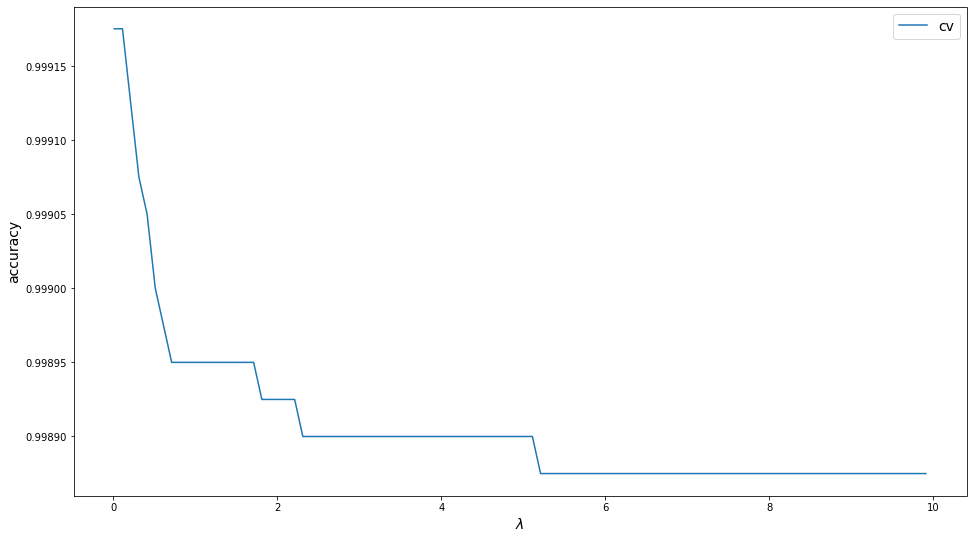

In [71]:

plt.figure(figsize=(16, 9))
plt.plot(lambdas, CV_scores, label="cv")
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("accuracy", fontsize=14)

plt.legend(fontsize=14)
plt.show()


In [75]:
#model needs no regularization
model= LogisticRegression(penalty='none',max_iter=100000)
model.fit(best_feature,y)
y_pred=model.predict(best_feature)
accuracy=model.score(x_test, y_test)
print('accuracy =',accuracy*100)

accuracy = 99.92999999999999
